In [248]:
import numpy as np
import matplotlib.pyplot as plt
#pip install matplotlib

# Maximum

In [7]:
def maximum(L):
    if len(L) == 0:
        return 0  
    m = L[0]
    for x in L:
        if x > m:
            m = x
    return m

La fonction "maximum" parcourt chaque element de la liste L une fois en effectuant a chaque fois des operations elementaires. La complexite de la fonction "maximum" est donc O(n) avec n la taille de la liste L.

In [9]:
max([1,23,424])

424

In [8]:
maximum([1,23,29302930,2])

29302930

In [3]:
maximum([-1,-3])

0

# Moyenne

In [49]:
Ltest = [1,5,-10,32,12]

In [18]:
def moyenne(L):
    s = 0.0
    for x in L:
        s += x
    return s/len(L)

La fonction "moyenne" parcout chaque element de la liste une fois en effectuant a chaque fois seulement des operations elementaires. **La complexite de la fonction "moyenne" est donc O(n)** avec n la taille de la liste en entree.

In [40]:
def carre(L):
    L1 = L.copy()#ATTENTION!!!!
    for i in range(len(L1)):
        L1[i] = L1[i]**2
    return L1

In [43]:
def ecart_type1(L):
    return np.sqrt(moyenne(carre(L))-moyenne(L)**2)

Complexite: O(n)

In [52]:
def ecart_type2(L):
    L_au_carre = [ x**2 for x in L ]
    return np.sqrt(moyenne(L_au_carre)-moyenne(L)**2)

In [82]:
def ecart_type3(L):
    L_EcartsAuCarre = [ (x-moyenne(L)**2) for x in L ]
    return np.sqrt(moyenne(L_EcartsAuCarre))

La fonction "ecart_type3" parcourt chaque element de la liste en effectuant a chaque fois un appel a la fonction "moyenne" dont la complexite est lineaire en la taille de la liste. **La complexite de la fonction "ecart_type3" est donc O(n^2)** avec n la taille de la liste en entree.

In [84]:
def ecart_type4(L):
    m = moyenne(L)
    L_EcartsAuCarre = [ (x-m**2) for x in L ]
    return np.sqrt(moyenne(L_EcartsAuCarre))

# Complexite

In [76]:
Ltest2 = [1]*10000

In [80]:
%%time
ecart_type2(Ltest2)

CPU times: user 15.9 ms, sys: 3.01 ms, total: 18.9 ms
Wall time: 16.9 ms


0.0

In [81]:
%%time
ecart_type3(Ltest2)

CPU times: user 1.82 ms, sys: 0 ns, total: 1.82 ms
Wall time: 1.82 ms


0.0

# Recherche Naive

In [111]:
def estDedans(L,e):
    for x in L:
        if x == e:
            return True
    return False

In [125]:
def estDedans2(L,e):
    i = 0
    n = len(L)
    
    while i < n and L[i] != e:
        i = i+1
    
    return i != n

In [126]:
estDedans2([1,2,3],10000)

False

# Recursivite

In [130]:
def suite_U(n):
    if n == 0:
        return 4
    return 3*suite_U(n-1)

In [127]:
def suiteGeometrique(a, b, n):
    if n == 0:
        return a
    return b*suiteGeometrique(a, b, n-1)    

In [131]:
def suite_V(n):
    if n == 0:
        return 35
    
    return n**(suite_V(n-1))*suiteGeometrique(n,n-1,n)

In [133]:
def factoriel(n):
    if n == 0:
        return 1
    return n*factoriel(n-1)

In [134]:
def factorielIter(n):
    facto = 1
    for m in range(1,n+1):
        facto *= m# facto = facto*m
    return facto

# Recherche dichotomique

In [154]:
def rechercheDichoRec(L,x):
    n = len(L)

    if n == 0:
        return False
    
    indiceMilieu = n//2
    valeurMilieu = L[indiceMilieu]
    
    if valeurMilieu == x:
        return True
    
    if valeurMilieu > x:
        return rechercheDichoRec(L[:indiceMilieu],x)
    
    return rechercheDichoRec(L[indiceMilieu+1:],x)

In [165]:
def rechercheDichoRec2(L,indiceDebut,indiceFin,x):
    n = indiceFin-indiceDebut #ATTENTION

    if n == 0:
        return False
    
    indiceMilieu = (indiceDebut+indiceFin)//2 #ATTENTION
    valeurMilieu = L[indiceMilieu]
    
    if valeurMilieu == x:
        return True
    
    if valeurMilieu > x:
        return rechercheDichoRec2(L, indiceDebut, indiceMilieu,x)
    
    return rechercheDichoRec2(L, indiceMilieu+1, indiceFin, x)

In [175]:
def rechercheDichoIter(L,x):
    
    indiceDebut = 0
    indiceFin   = len(L)
    n           = indiceFin - indiceDebut
    
    while n != 0:   
        indiceMilieu = (indiceDebut+indiceFin)//2
        valeurMilieu = L[indiceMilieu]

        if valeurMilieu == x:
            return True
        
        if valeurMilieu > x:
            indiceFin = indiceMilieu
        else:
            indiceDebut = indiceMilieu+1
            
        n = indiceFin - indiceDebut #ATTENTION
            
    return False

In [183]:
L = [1,3, 5]
rechercheDichoIter(L,5)

True

# Fibonacci

In [192]:
def fibo1(n):
    f = [0,1]
    for i in range(2,n+1):
        f.append( f[-1]+f[-2] )
    return f[-1]

In [236]:
def fibo3(n):
    f = [0,1]
    for i in range(2,n+1):
        somme = f[0]+f[1]
        f[0] = f[1]
        f[1] = somme
    return ( 0 if n == 0 else f[-1] )

In [240]:
def fibo_rec(n):
    if n < 2:
        return n
    return fibo_rec(n-1) + fibo_rec(n-2)

In [242]:
%%time
fibo3(35)

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 44.6 µs


9227465

In [243]:
%%time
fibo_rec(35)

CPU times: user 3.25 s, sys: 817 µs, total: 3.25 s
Wall time: 3.25 s


9227465

# Numpy

In [256]:
y = np.array([4,5,6])
print(y)
print(y+1)
print(y**2)
print(y/2)
print(y.mean())
print(y.std())

[4 5 6]
[5 6 7]
[16 25 36]
[2.  2.5 3. ]
5.0
0.816496580927726


In [261]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)
print(A.dot(A))
I = np.eye(3)
print(np.linalg.inv(I))
print(A.dot(I))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


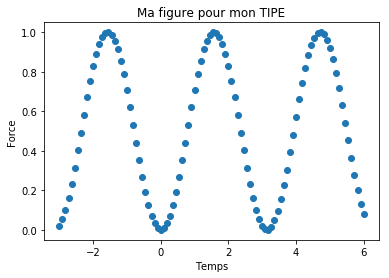

In [285]:
a = -3
b = 6
N = 100
#print( len( np.linspace(a,b,N) ) )
#print( len( np.arange(a,b,(b-a)/N ) ) )
x = np.linspace(a,b,N)

plt.plot( x, np.sin(x)**2, 'o' )
plt.title("Ma figure pour mon TIPE")
plt.xlabel("Temps")
plt.ylabel("Force")
plt.show()

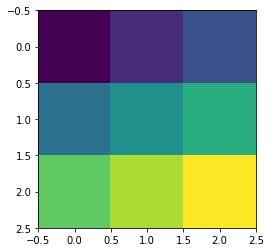

In [291]:
plt.imshow(A)
plt.show()

# Methode des trapezes

In [302]:
def aireTrapeze(base,hauteur1,hauteur2):
    aireRectangle = base*min(hauteur1,hauteur2)
    aireTriangle  = (base*abs(hauteur1-hauteur2))/2
    
    return aireRectangle+aireTriangle

def methodeTrapeze(f,a,b,N=10000):
    x               = np.linspace(a,b,N)
    approxIntegrale = 0
    pasApprox       = (b-a)/N
    
    for i in range(len(x)-1):
        approxIntegrale += aireTrapeze(pasApprox, f(x[i]), f(x[i+1]))
        
    return approxIntegrale

In [304]:
methodeTrapeze(lambda x: x**2, -3, 6,1000000)

80.999919000122

# Approx pi par Monte Carlo

In [305]:
import random

In [306]:
random.random() #U[0,1]

0.2038150582504572

In [330]:
def estDansCercle(point):
    return point[0]**2 + point[1]**2 <= 1

In [343]:
N = 1000
listePointsAleatoire = np.array([ [random.random(),random.random()] for i in range(N) ])
pointsDansCercle = []
pointsPasDansCercle = []
for point in listePointsAleatoire:
    if estDansCercle(point):
        pointsDansCercle.append(point)
    else:
        pointsPasDansCercle.append(point)

In [344]:
pointsDansCercle = np.array(pointsDansCercle)
pointsPasDansCercle = np.array(pointsPasDansCercle)

In [349]:
pointsDansCercle = listePointsAleatoire[ (listePointsAleatoire[ :, 0 ]**2 + listePointsAleatoire[ :, 1 ]**2) <= 1 ]
pointsPasDansCercle = listePointsAleatoire[ ~( (listePointsAleatoire[ :, 0 ]**2 + listePointsAleatoire[ :, 1 ]**2) <= 1 ) ]

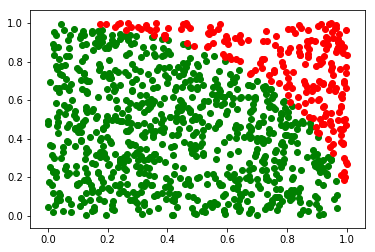

In [350]:
plt.scatter(pointsDansCercle[:,0], pointsDansCercle[:,1], c = 'g')
plt.scatter(pointsPasDansCercle[:,0], pointsPasDansCercle[:,1], c=  'r')
plt.show()

In [347]:
len(pointsDansCercle)/len(listePointsAleatoire)*4

3.148